## Week 4 Individual Assignment
# Mapping Land Use and Zoning in San Francisco (2015)

For this week's homework assignment, I will be mapping certain land uses in San Francisco as a categorical variables impacting public health and asmtha rates in the city. The data I am using is a GeoJSON file of the 2015 Zoning Map from the SF Data Portal. I decided to use the map from 2015 because our group is using data on asmtha rates and poverty levels that is based on the 2010 Census. The California Department for Housing and Community Development requires jurisdictions update their Land Use and Housing Elements on specific planning cycles. On July 18, 2013, the ABAG (Association for Bay Area Governments) issued the final RHNA allocations to jurisdictions with the deadline of having their updated housing elements approved by HCD by January 31, 2015. SF's 2014 Housing Element was approved on May 29, 2015. As such, I've used the 2015 zoning map to compare against asthma and health insurance data from the 2010 census. 


In [1]:
#importing libraries
import pandas as pd
import geopandas as gpd
import plotly.express as px

In [3]:
#loading the 2015 Zoning Maps' GeoJSON data file as geopandas
df = gpd.read_file('data/SFZoningDistricts_Jan2015.geojson')

# Inspecting and Cleaning Up the Data

In [4]:
#inspecting the shape of the file
df.shape

(9978, 7)

In [5]:
df.head()

,zoning_sim,districtna,shape_area,url,multigeom,shape_len,geometry
0,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",13901.1426915,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,552.715581654,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",11413.2653614,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,602.155213139,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",14482.4919657,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,607.84767868,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",54869.3000022,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,1524.97422258,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,NC-3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",12643.7618017,http://www.amlegal.com/nxt/gateway.dll/Califor...,false,478.416741548,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."


In [6]:
# Looking at the data types
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   zoning_sim  9978 non-null   object  
 1   districtna  9978 non-null   object  
 2   shape_area  9978 non-null   object  
 3   url         9909 non-null   object  
 4   multigeom   9978 non-null   object  
 5   shape_len   9978 non-null   object  
 6   geometry    9978 non-null   geometry
dtypes: geometry(1), object(6)
memory usage: 545.8+ KB


In [7]:
# Defining the columns to keep (zoning district name, zoning use abbreviation, area, and geometry).
columns_to_keep = ['districtna',
                   'zoning_sim',
                   'shape_area',
                   'geometry']

In [8]:
# Adding these columns to a new dataframe
df2 = df[columns_to_keep].copy()
df2

,districtna,zoning_sim,shape_area,geometry
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."
...,...,...,...,...
9973,EXCELSIOR OUTER MISSION NCD,NCD,15828.0104436,"POLYGON ((-122.44363 37.71318, -122.44378 37.7..."
9974,EXCELSIOR OUTER MISSION NCD,NCD,24179.2035499,"POLYGON ((-122.44272 37.71374, -122.44280 37.7..."
9975,EXCELSIOR OUTER MISSION NCD,NCD,31868.2001932,"POLYGON ((-122.44368 37.71379, -122.44374 37.7..."
9976,EXCELSIOR OUTER MISSION NCD,NCD,23104.3156526,"POLYGON ((-122.44230 37.71451, -122.44238 37.7..."


In [9]:
# Renaming the columns
df2.columns = ['ZoningDistrict',
               'ZoningCode',
               'Area',
               'geometry']

In [10]:
#Checking to make sure the column names were updated correctly.
df2.head()

,ZoningDistrict,ZoningCode,Area,geometry
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7..."
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7..."
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7..."
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7..."
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7..."


In [11]:
# I want to see the number of different types of zoning districts there are in San Francisco 
df2['ZoningDistrict'].value_counts()

RESIDENTIAL- HOUSE, ONE FAMILY                 1949
RESIDENTIAL- HOUSE, TWO FAMILY                 1514
PUBLIC                                          814
RESIDENTIAL- MIXED, LOW DENSITY                 750
RESIDENTIAL- HOUSE, THREE FAMILY                661
                                               ... 
RESIDENTIAL - MIXED, LOW DENSITY                  1
PARKMERCED-COMMUNITY/FITNESS                      1
HEAVY COMMERCIAL                                  1
UPPER MARKET STREET NEIGHBORHOOD COMMERCIAL       1
PARKMERCED-SCHOOL                                 1
Name: ZoningDistrict, Length: 96, dtype: int64

In [12]:
# adding a 'Use' column to group similar land uses together to stream line presentation in the forthcoming maps
df2['use'] = ''

In [19]:
#defining common names for the land uses I'm interested in focusing on

df2.loc[df2['ZoningCode'] == 'M-1', 'use'] = 'Industrial' # M-1 is Light Industrial
df2.loc[df2['ZoningCode'] == 'M-2', 'use'] = 'Industrial' # M-2 is Heavy Industrial
df2.loc[df2['ZoningCode'] == 'HP-RA', 'use'] = 'Hunters Point' # HP-RA is the Hunter's Point Redevelopment District
df2.loc[df2['ZoningCode'] == 'PDR-1-B', 'use'] = 'Production, Distribution, Repair' # PDR-1-B is a Production, Distribution, and Repair District for industrial uses 
df2.loc[df2['ZoningCode'] == 'PDR-1-D', 'use'] = 'Production, Distribution, Repair' # PDR-1-D is a Production, Distribution, and Repair District for industrial uses
df2.loc[df2['ZoningCode'] == 'PDR-1-G', 'use'] = 'Production, Distribution, Repair' # PDR-1-G is a Production, Distribution, and Repair District for industrial uses
df2.loc[df2['ZoningCode'] == 'PDR-2', 'use'] = 'Production, Distribution, Repair' # PDR-2 is a Production, Distribution, and Repair District for industrial uses
df2.loc[df2['ZoningCode'] == 'P', 'use'] = 'Public' # P is Public space which includes park space and areas around highways and freeways

In [20]:
# fillng the color column for all other zones as 'Other' for the sake of formatting and presentation
df2['use'].fillna(value='Other', inplace=True)
df2.head()

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
0,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,13901.1426915,"POLYGON ((-122.39202 37.73010, -122.39207 37.7...",,NaN,Other
1,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,11413.2653614,"POLYGON ((-122.39165 37.73087, -122.39172 37.7...",,NaN,Other
2,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,14482.4919657,"POLYGON ((-122.39134 37.73169, -122.39144 37.7...",,NaN,Other
3,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,54869.3000022,"POLYGON ((-122.39187 37.73195, -122.39190 37.7...",,NaN,Other
4,"NEIGHBORHOOD COMMERCIAL, MODERATE SCALE",NC-3,12643.7618017,"POLYGON ((-122.39103 37.73262, -122.39113 37.7...",,NaN,Other


In [21]:
df2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9978 entries, 0 to 9977
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ZoningDistrict  9978 non-null   object  
 1   ZoningCode      9978 non-null   object  
 2   Area            9978 non-null   object  
 3   geometry        9978 non-null   geometry
 4   Use             9978 non-null   object  
 5   Colors          1225 non-null   object  
 6   use             9978 non-null   object  
dtypes: geometry(1), object(6)
memory usage: 545.8+ KB


In [23]:
# creating a color dictionary to color code the map

color_dict = {'Industrial': 'purple',
              'Hunters Point': 'red',
              'Open Space': 'green',
              'Public': 'darkgrey',
              'Other': 'lightgrey',
              'Production, Distribution, Repair' : 'orange'}


In [24]:
#creating a new column for the colors and filling them with corresponding colors in the dictionary
df2['Colors'] = df2['use'].map(color_dict)

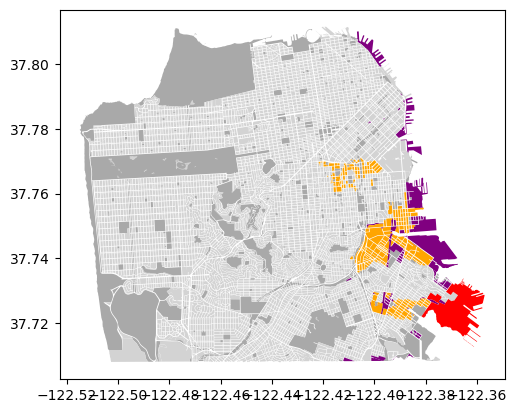

In [25]:
ax = df2.plot(color = df2['Colors'])

(-122.52284577653062, -122.349079459232, 37.70273605347802, 37.81675706669754)

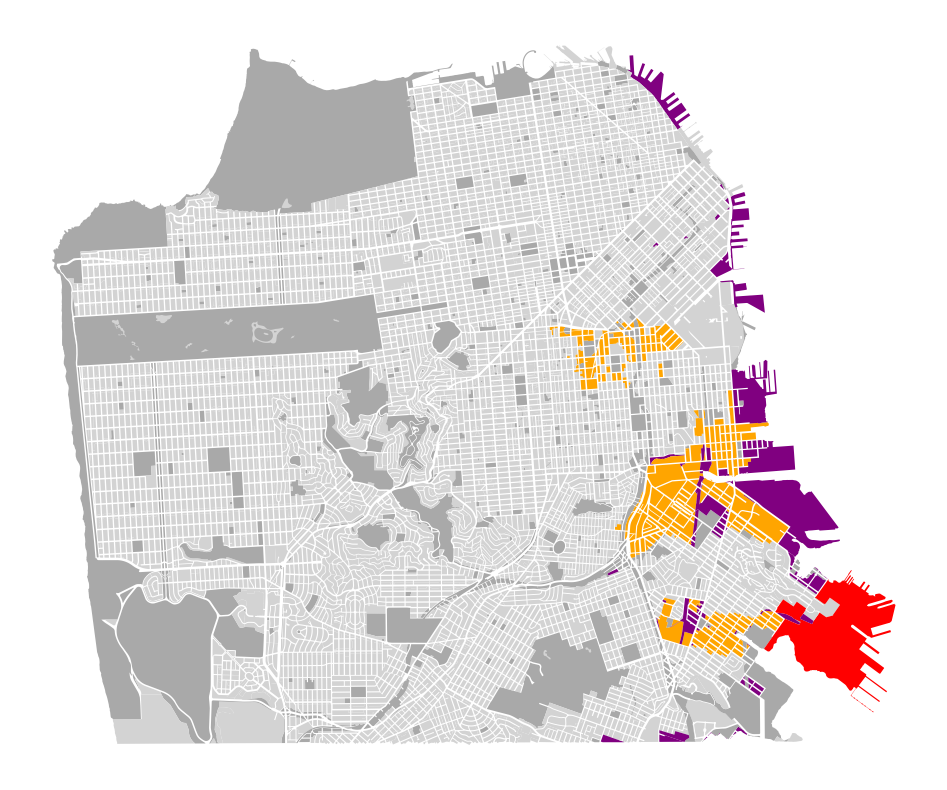

In [26]:
ax1 = df2.plot(color = df2['Colors'],
              figsize=(12,10),
              legend = True,
              legend_kwds={
                  'loc': 'upper right',
                  'bbox_to_anchor' : (1,1)
              }
             )
ax1.axis('off')

In [35]:
# Mapping with Maptplotly

import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [36]:
df2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
# color coding the map - creating a key
keys = list(df2['use'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = df2['Colors']
color_dict = dict(zip(keys, colors))

In [39]:
# preparing the grid
row_count = df2['use'].nunique()

In [40]:
ax_list = []

In [41]:
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))

In [42]:
ax_string = ', '.join(ax_list)

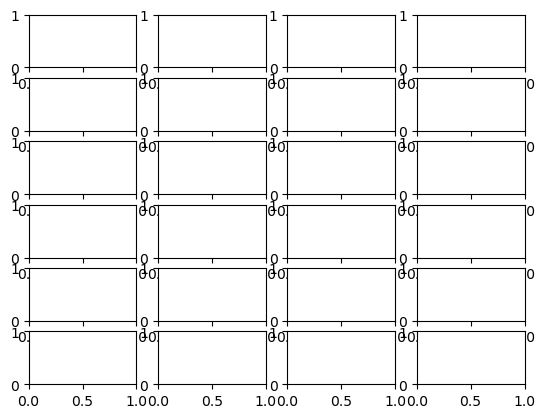

In [43]:
fig, (ax_string) = plt.subplots(row_count, 4)

KeyError: 'Colors'

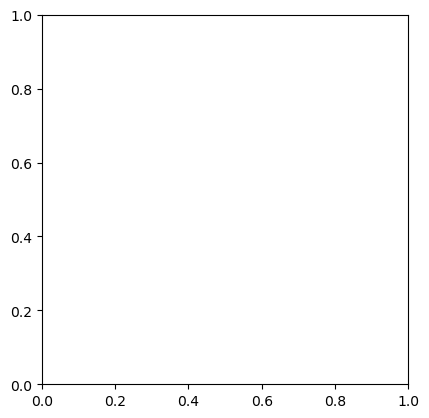

In [45]:
ax1 = plt.subplot2grid((row_count,4),(0,1), rowspan=row_count, colspan=3)
for index, row in df2.iterrows():
    plot = df2[df2['use'] == row['use']].plot(color=color_dict['Colors'], ax=ax1)
ax1.axis('off')

# Focusing in on Specific Land Uses:

For our project, we are most interested in looking at the land uses that pose a risk to public health such as Industry, Production, Distribution, and Repair, and the Hunter's Point Redevelopment District. 

In [27]:
# I'm running a query to see how many Light Industrial Zones (M-1) exist in San Francisco.

df2[df2['ZoningCode']=='M-1'] #M-1 Light Industrial

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7...",Industrial,purple,Industrial
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7...",Industrial,purple,Industrial
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7...",Industrial,purple,Industrial
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7...",Industrial,purple,Industrial
443,LIGHT INDUSTRIAL,M-1,533.756396874,"POLYGON ((-122.39426 37.74373, -122.39432 37.7...",Industrial,purple,Industrial
...,...,...,...,...,...,...,...
8578,LIGHT INDUSTRIAL,M-1,7492.45535673,"POLYGON ((-122.38844 37.74001, -122.38885 37.7...",Industrial,purple,Industrial
8579,LIGHT INDUSTRIAL,M-1,111907.966555,"POLYGON ((-122.38928 37.73937, -122.38942 37.7...",Industrial,purple,Industrial
8580,LIGHT INDUSTRIAL,M-1,90951.5975165,"POLYGON ((-122.38912 37.73980, -122.38915 37.7...",Industrial,purple,Industrial
8581,LIGHT INDUSTRIAL,M-1,70963.257074,"POLYGON ((-122.38882 37.74066, -122.38887 37.7...",Industrial,purple,Industrial


In [28]:
#Saving this subset as a new dataframe (m1)
m1 = df2[df2.ZoningCode =='M-1']

In [29]:
# I'm now running the same query but for Heavy Industrial Zones (M-2)
df2[df2['ZoningCode']=='M-2'] #M-2 Heavy Industrial

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7...",Industrial,purple,Industrial
449,HEAVY INDUSTRIAL,M-2,10915.7027815,"POLYGON ((-122.38705 37.70959, -122.38733 37.7...",Industrial,purple,Industrial
461,HEAVY INDUSTRIAL,M-2,2217.87888584,"POLYGON ((-122.38908 37.70918, -122.38847 37.7...",Industrial,purple,Industrial
462,HEAVY INDUSTRIAL,M-2,2091.31149466,"POLYGON ((-122.38788 37.70885, -122.38793 37.7...",Industrial,purple,Industrial
463,HEAVY INDUSTRIAL,M-2,289051.281626,"POLYGON ((-122.40123 37.70947, -122.40026 37.7...",Industrial,purple,Industrial
464,HEAVY INDUSTRIAL,M-2,3823.80677901,"POLYGON ((-122.39033 37.70930, -122.39038 37.7...",Industrial,purple,Industrial
529,HEAVY INDUSTRIAL,M-2,87138.8056897,"POLYGON ((-122.38548 37.71011, -122.38512 37.7...",Industrial,purple,Industrial
1744,HEAVY INDUSTRIAL,M-2,212.141631591,"POLYGON ((-122.38824 37.74886, -122.38814 37.7...",Industrial,purple,Industrial
1827,HEAVY INDUSTRIAL,M-2,189.704985145,"POLYGON ((-122.38649 37.74796, -122.38649 37.7...",Industrial,purple,Industrial
5300,HEAVY INDUSTRIAL,M-2,80667.1087102,"POLYGON ((-122.38393 37.75186, -122.38462 37.7...",Industrial,purple,Industrial


In [31]:
#Saving the M-2 Heavy Industrial Zones as a new dataframe (m2)
m2=df2[df2['ZoningCode']=='M-2']

In [32]:
#I'm joining the dataframes I created for the Light and Heavy Industrial zones to create one map of all industrial zones
industry = df2[(df2['ZoningCode'] == 'M-2') | (df2['ZoningCode']=='M-1')]

In [34]:
industry.head()

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
384,LIGHT INDUSTRIAL,M-1,6536.41645764,"POLYGON ((-122.39276 37.75221, -122.39306 37.7...",Industrial,purple,Industrial
385,LIGHT INDUSTRIAL,M-1,19425.4747173,"POLYGON ((-122.39620 37.78332, -122.39580 37.7...",Industrial,purple,Industrial
386,LIGHT INDUSTRIAL,M-1,46621.7452607,"POLYGON ((-122.38984 37.78622, -122.39060 37.7...",Industrial,purple,Industrial
387,LIGHT INDUSTRIAL,M-1,34577.3287338,"POLYGON ((-122.38833 37.78886, -122.38813 37.7...",Industrial,purple,Industrial
409,HEAVY INDUSTRIAL,M-2,248055.578145,"POLYGON ((-122.37484 37.72599, -122.37498 37.7...",Industrial,purple,Industrial


In [36]:
#running the same queries for Production, Distribution, and Repair Districts which are also industrial uses
df2[df2['ZoningCode']=='PDR-1-B']
df2[df2['ZoningCode']=='PDR-1-D']
df2[df2['ZoningCode']=='PDR-1-G']
df2[df2['ZoningCode']=='PDR-2']

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
801,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,121207.813049,"POLYGON ((-122.38943 37.72322, -122.38963 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
914,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,80744.852759,"POLYGON ((-122.40105 37.73865, -122.40152 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
1788,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,5076.07209134,"POLYGON ((-122.39700 37.74277, -122.39728 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
3751,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,22705.9026858,"POLYGON ((-122.40678 37.73856, -122.40679 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
3752,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,39469.29565,"POLYGON ((-122.40751 37.73846, -122.40756 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
...,...,...,...,...,...,...,...
7209,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,76416.9144422,"POLYGON ((-122.38564 37.74920, -122.38632 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
7252,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,47736.6178274,"POLYGON ((-122.38561 37.72328, -122.38557 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
7253,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,341276.618313,"POLYGON ((-122.39353 37.72493, -122.39166 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
7362,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,121130.769404,"POLYGON ((-122.39017 37.72552, -122.39037 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"


In [37]:
#saving these as another data frame to map and see where they're located in the city
pdr = df2[(df2['ZoningCode'] == 'PDR-1-B') | (df2['ZoningCode']=='PDR-1-G') | (df2['ZoningCode'] == 'PDR-1-D') | (df2['ZoningCode']=='PDR-2')]

<AxesSubplot: >

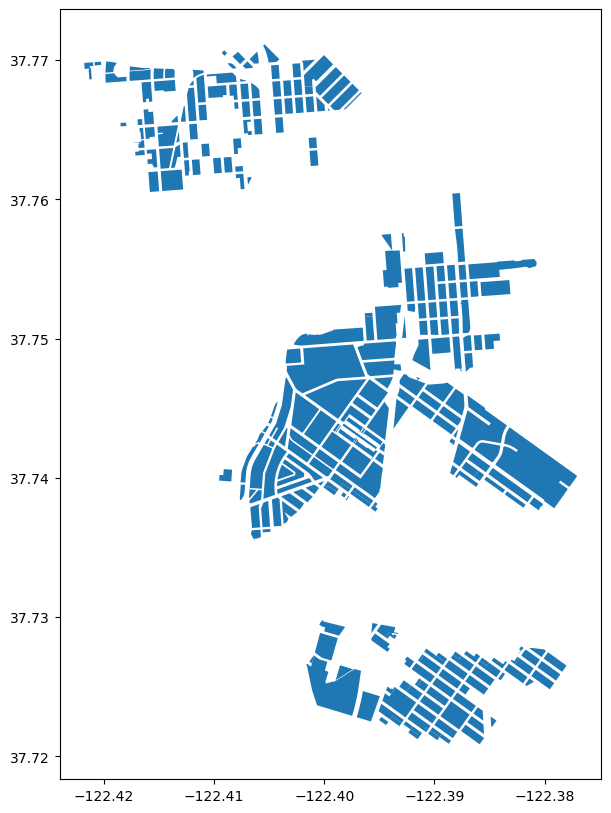

In [38]:
pdr.plot(figsize=(12,10))

In [35]:
#Creating a new dataframe for the Hunter's Point district (HP-RA).
hp=df2[df2['ZoningCode']=='HP-RA']

In [39]:
#Creating a new dataframe to combine the industrial, PDR, and Hunter's Point
focus = df2[(df2['ZoningCode'] == 'M-2') | (df2['ZoningCode']=='M-1') | (df2['ZoningCode']=='HP-RA') | (df2['ZoningCode'] == 'PDR-1-B') | (df2['ZoningCode']=='PDR-1-G') | (df2['ZoningCode'] == 'PDR-1-D') | (df2['ZoningCode']=='PDR-2')]

In [41]:
focus.sample(5)

,ZoningDistrict,ZoningCode,Area,geometry,Use,Colors,use
5300,HEAVY INDUSTRIAL,M-2,80667.1087102,"POLYGON ((-122.38393 37.75186, -122.38462 37.7...",Industrial,purple,Industrial
2762,"PRODUCTION, DISTRIBUTION & REPAIR - 1 - GENERAL",PDR-1-G,80191.2177914,"POLYGON ((-122.40054 37.76243, -122.40123 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
4116,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,106616.025169,"POLYGON ((-122.40422 37.73885, -122.40422 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
3751,"PDR PRODUCTION, DISTRIBUTION, AND REPAIR",PDR-2,22705.9026858,"POLYGON ((-122.40678 37.73856, -122.40679 37.7...","Production, Distribution, Repair",orange,"Production, Distribution, Repair"
2392,LIGHT INDUSTRIAL,M-1,6115.77170583,"POLYGON ((-122.38529 37.71811, -122.38525 37.7...",Industrial,purple,Industrial


<AxesSubplot: >

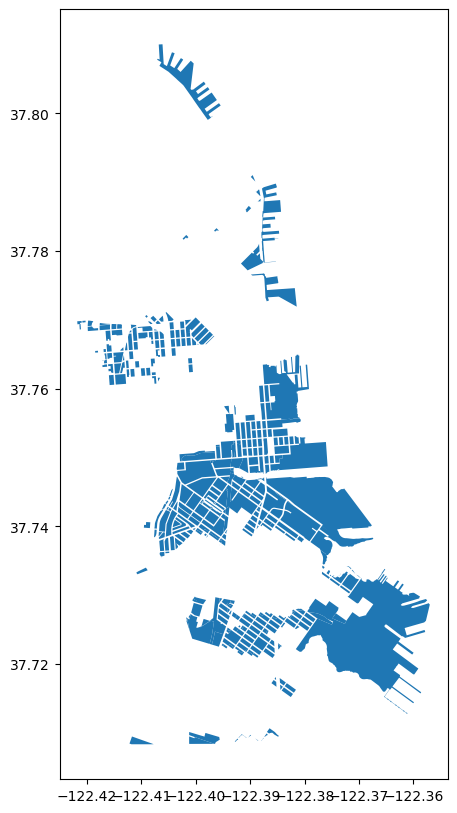

In [43]:
focus.plot(figsize=(12,10)) #plotting the dataframe to see the uses together

# Mapping with Matplotlib for Alternative Styles

I'm going to try creating the same land use and zoning map using matplotlib to see if I can play around with the formatting and style.

In [44]:
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [45]:
focus.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

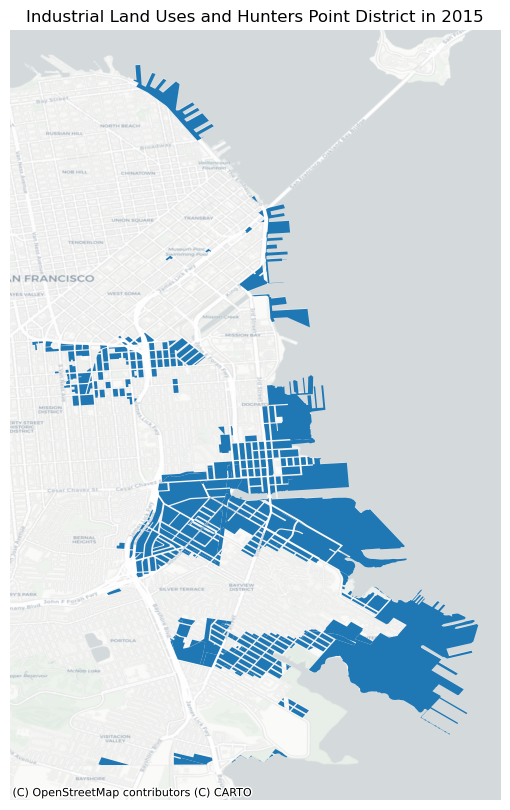

In [48]:
#starting the plot
fig, ax = plt.subplots(figsize=(20,10))

#adding the data options
focus.plot(ax=ax,
           marker='Use',
           markersize=5)

#turning off the axes
ax.axis('off')

#giving it a title
ax.set_title('Industrial Land Uses and Hunters Point District in 2015')

#adding a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

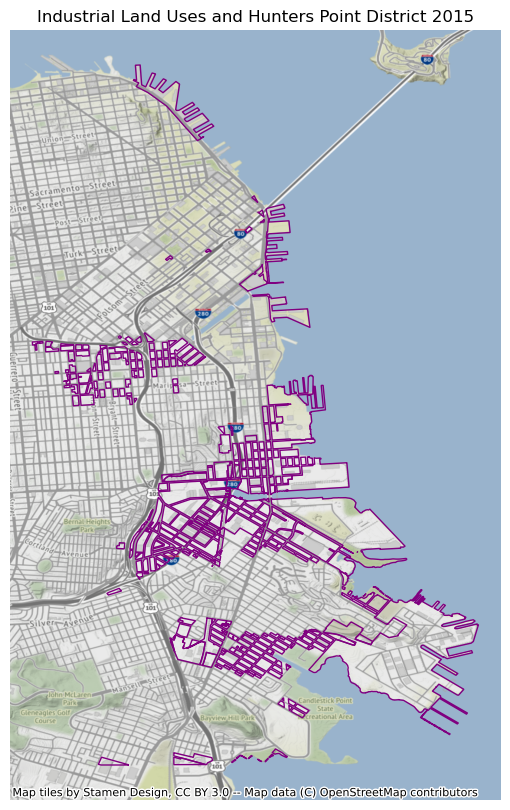

In [53]:
#trying out a different format to show the outline of these districts as opposd to filling them in
#starting the plot
fig, ax = plt.subplots(figsize=(20,10))

#adding the data options
focus.plot(ax=ax,
           marker='use',
           markersize=5,
           facecolor='none',
           edgecolor='purple')
           

#turning off the axes
ax.axis('off')

#giving it a title
ax.set_title('Industrial Land Uses and Hunters Point District 2015')

#adding a basemap
ctx.add_basemap(ax, crs=4326)